<a href="https://colab.research.google.com/github/tawseeq1/cognitive-distortions/blob/main/topic_modelling_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_comments_original_sgexams  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/sgexams_comments_Oct2023.csv')
data_posts_original_sgexams  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/sgexams_posts_Oct2023.csv')

In [ ]:
data_comments_teen_original1  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_1.csv')
data_comments_teen_original2  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_2.csv')
data_comments_teen_original3  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_3.csv', on_bad_lines='skip', engine='python')
data_comments_teen_original4  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_4.csv', on_bad_lines='skip', engine='python')

data_posts_original_teen  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_posts.csv')
data_comments_original_teen = pd.concat([data_comments_teen_original1, data_comments_teen_original2, data_comments_teen_original3, data_comments_teen_original4])

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq')

In [ ]:
import targetwords

In [ ]:
from targetwords import target_catastrophizing
from targetwords import target_dichotomous_Reasoning
from targetwords import target_disqualifying_the_positives
from targetwords import target_emotional_reasoning
from targetwords import target_labeling_and_mislabeling
from targetwords import target_magnification_and_minimization
from targetwords import target_mental_filtering
from targetwords import target_mindreading
from targetwords import target_overgeneralizing
from targetwords import target_personalizing
from targetwords import target_should_statements
from targetwords import target_fortune_telling

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.1 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from nltk.tokenize import sent_tokenize

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
comments = data_comments_original_sgexams['body'].dropna().astype(str).tolist()
data_posts_original_sgexams['text'] = data_posts_original_sgexams['title'] + '.' + data_posts_original_sgexams['body']
posts = data_posts_original_sgexams['text'].dropna().astype(str).tolist()

In [ ]:
comments2 = data_comments_original_teen['body'].dropna().astype(str).tolist()
data_posts_original_teen['text'] = data_posts_original_teen['title'] + '.' + data_posts_original_teen['body']
posts2 = data_posts_original_teen['text'].dropna().astype(str).tolist()

In [ ]:
comments_total = comments + comments2
posts_total = posts + posts2

In [ ]:
all_sentences = comments + posts

In [ ]:
all_sentences2 = comments2 + posts2

In [ ]:
all_sentences_total = all_sentences + all_sentences2

In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def filter_sentences(sentences, ngrams):
        filtered_sentences = []
        for sentence in sentences:
            for ngram in ngrams:
                if ngram in sentence:
                    filtered_sentences.append(sentence)
                    break
        return filtered_sentences
def evaluate(embeddings, k_range):
        scores = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
            labels = kmeans.labels_
            score = davies_bouldin_score(embeddings, labels)
            scores.append(score)
            # print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
        return scores

In [ ]:
def process1(sentences):
    target_ngrams = targetwords.target_catastrophizing

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for Catastrophizing is: {optimal_k}')
    return optimal_k, scores



optimal_k1, scores1 = process1(all_sentences_total)

The optimal number of clusters for Catastrophizing is: 47


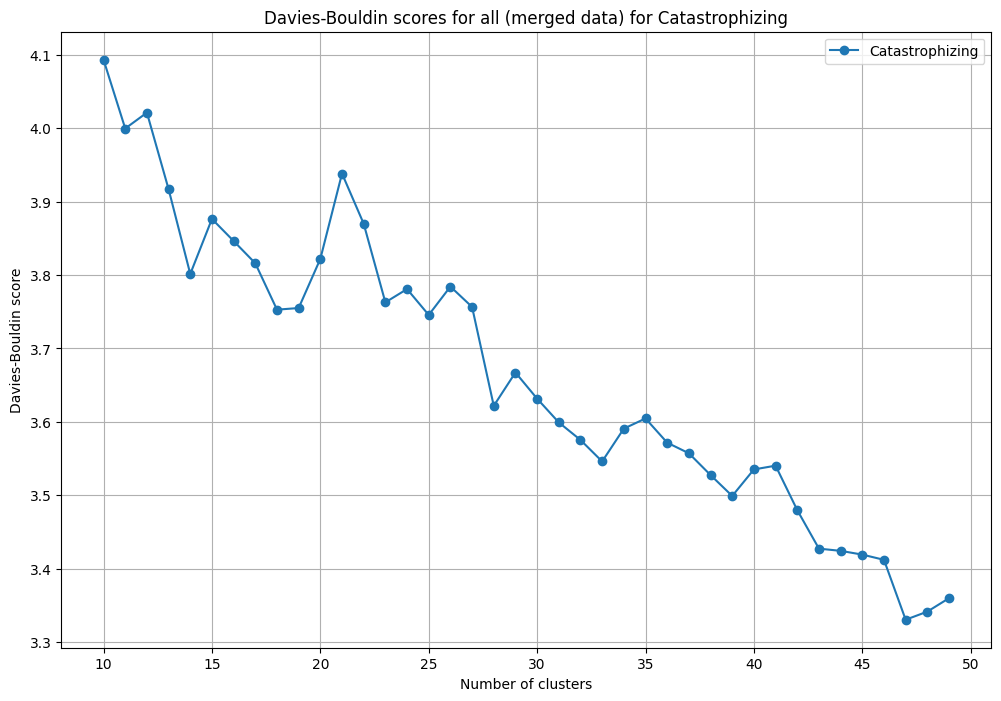

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores1, marker='o', label='Catastrophizing')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for Catastrophizing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process2(sentences):
    target_ngrams = target_dichotomous_Reasoning

    filtered_sentences2 = filter_sentences(sentences, target_ngrams)
    embeddings2 = model.encode(filtered_sentences2)

    k_range = range(10, 50)
    scores12 = evaluate(embeddings2, k_range)
    optimal_k2 = k_range[np.argmin(scores2)]
    print(f'The optimal number of clusters for target_dichotomous_Reasoning is: {optimal_k2}')
    return optimal_k2, scores2

optimal_k2, scores2 = process2(all_sentences_total)

plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores2, marker='o', label='target_dichotomous_Reasoning')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_dichotomous_Reasoning')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
def process3(sentences):
    target_ngrams = target_disqualifying_the_positives

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_emotional_reasoning is: {optimal_k}')
    return optimal_k, scores

optimal_k3, scores3 = process3(all_sentences_total)

The optimal number of clusters for target_emotional_reasoning is: 49


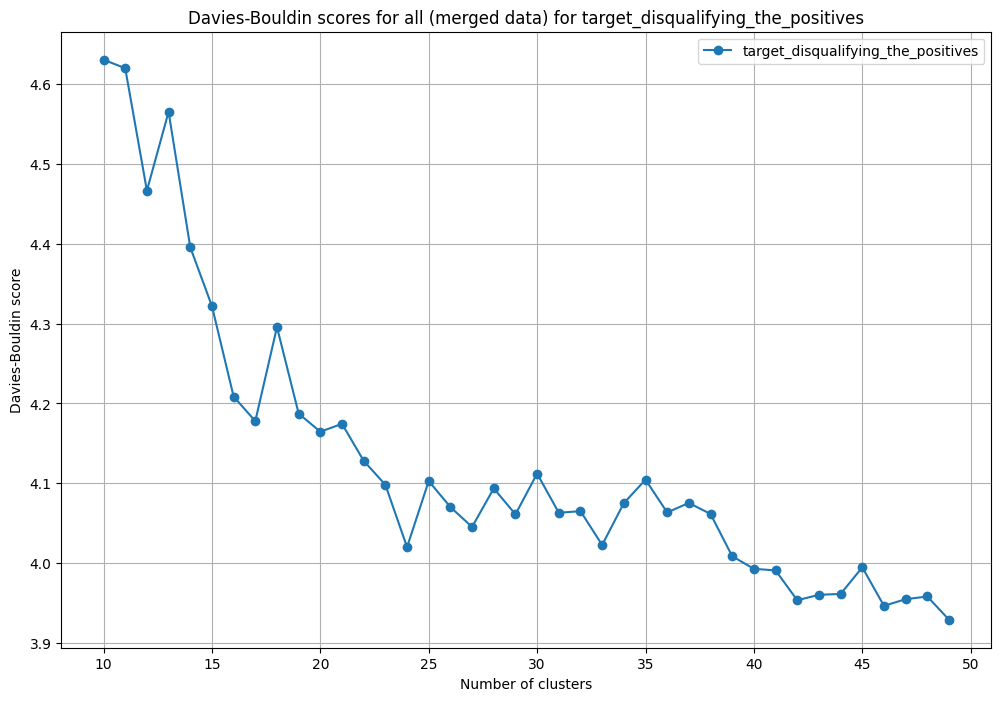

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores3, marker='o', label='target_disqualifying_the_positives')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_disqualifying_the_positives')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process4(sentences):
    target_ngrams = target_emotional_reasoning

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_emotional_reasoning is: {optimal_k}')
    return optimal_k, scores

optimal_k4, scores4 = process4(all_sentences_total)

The optimal number of clusters for target_emotional_reasoning is: 49


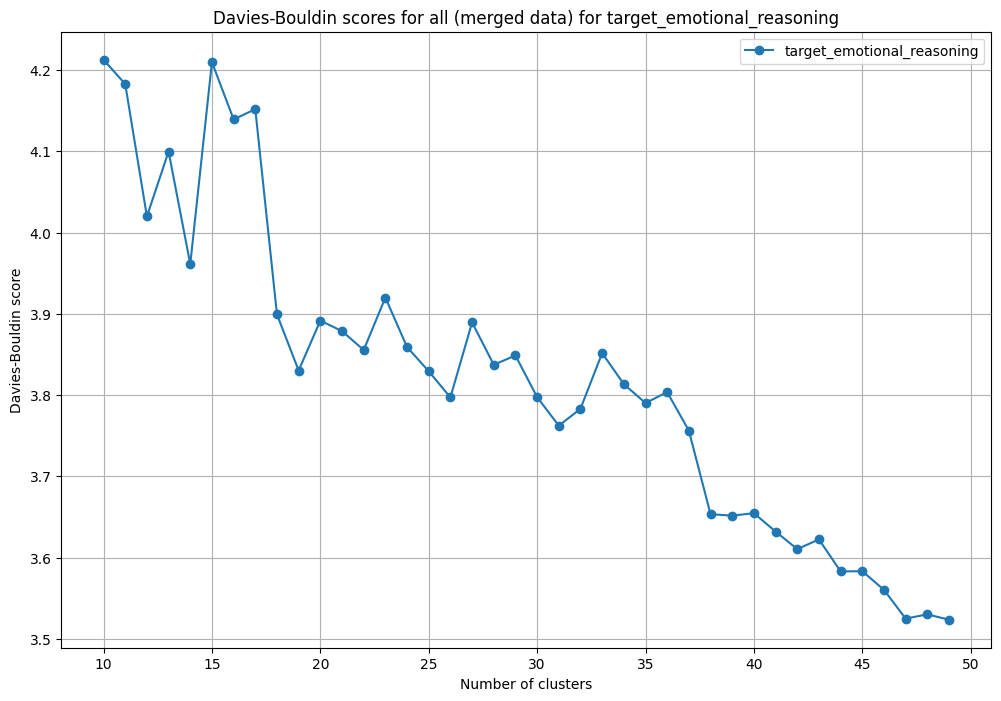

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores4, marker='o', label='target_emotional_reasoning')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_emotional_reasoning')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process5(sentences):
    target_ngrams = target_fortune_telling

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_fortune_telling is: {optimal_k}')
    return optimal_k, scores

optimal_k5, scores5 = process5(all_sentences_total)

The optimal number of clusters for target_fortune_telling is: 46


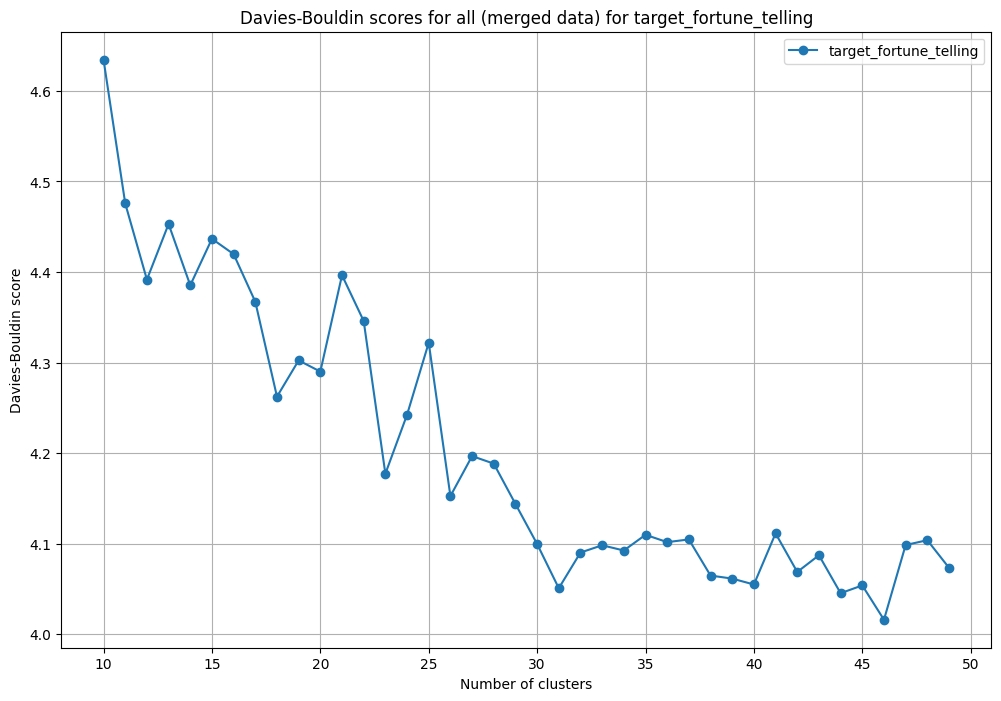

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores5, marker='o', label='target_fortune_telling')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_fortune_telling')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process6(sentences):
    target_ngrams = target_labeling_and_mislabeling

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_labeling_and_mislabeling is: {optimal_k}')
    return optimal_k, scores

optimal_k6, scores6 = process6(all_sentences_total)

The optimal number of clusters for target_labeling_and_mislabeling is: 47


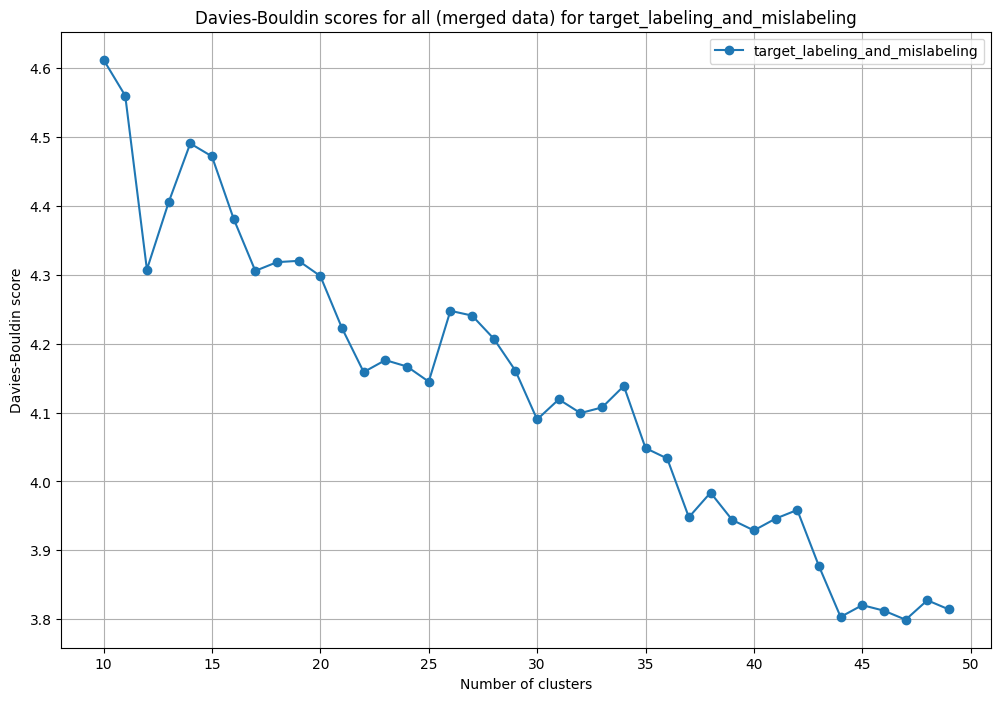

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores6, marker='o', label='target_labeling_and_mislabeling')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_labeling_and_mislabeling')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process7(sentences):
    target_ngrams = target_magnification_and_minimization

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_magnification_and_minimization is: {optimal_k}')
    return optimal_k, scores

optimal_k7, scores7 = process7(all_sentences_total)

The optimal number of clusters for target_magnification_and_minimization is: 48


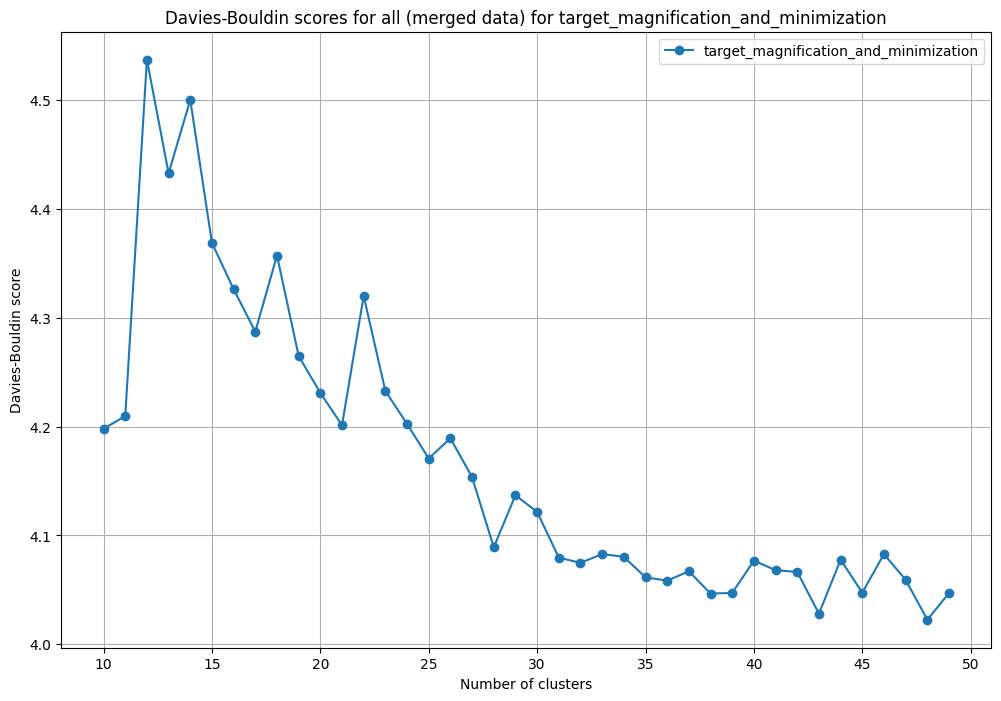

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores7, marker='o', label='target_magnification_and_minimization')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_magnification_and_minimization')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process8(sentences):
    target_ngrams = target_mental_filtering

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_mental_filtering is: {optimal_k}')
    return optimal_k, scores

optimal_k8, scores8 = process8(all_sentences_total)

The optimal number of clusters for target_mental_filtering is: 49


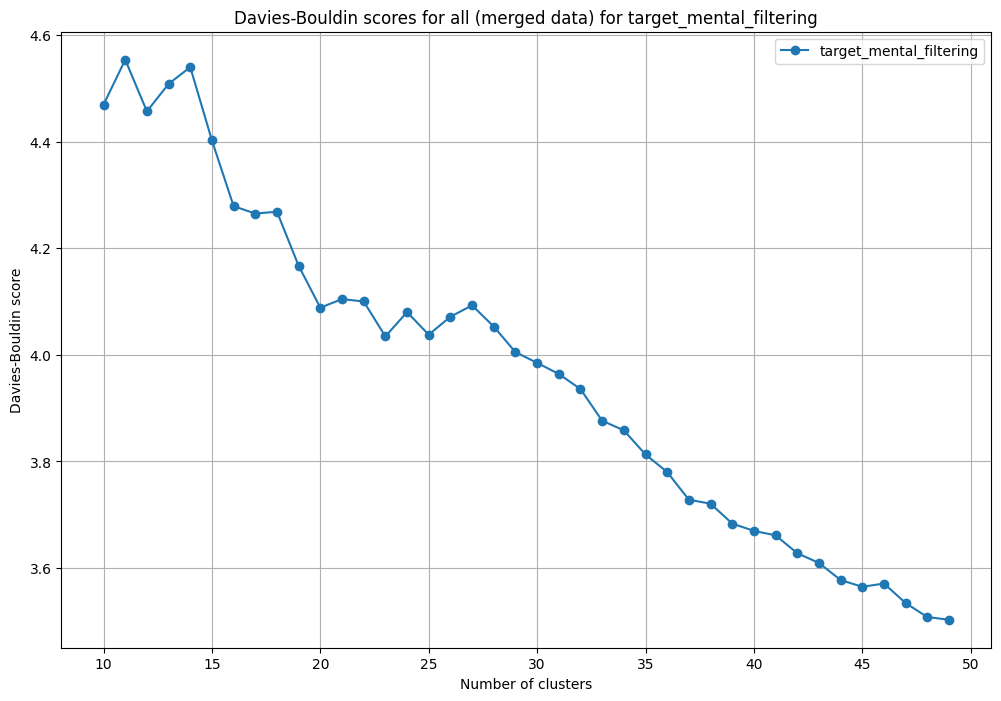

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores8, marker='o', label='target_mental_filtering')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_mental_filtering')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process9(sentences):
    target_ngrams = target_mindreading

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_mindreading is: {optimal_k}')
    return optimal_k, scores

optimal_k9, scores9 = process9(all_sentences_total)

The optimal number of clusters for target_mindreading is: 45


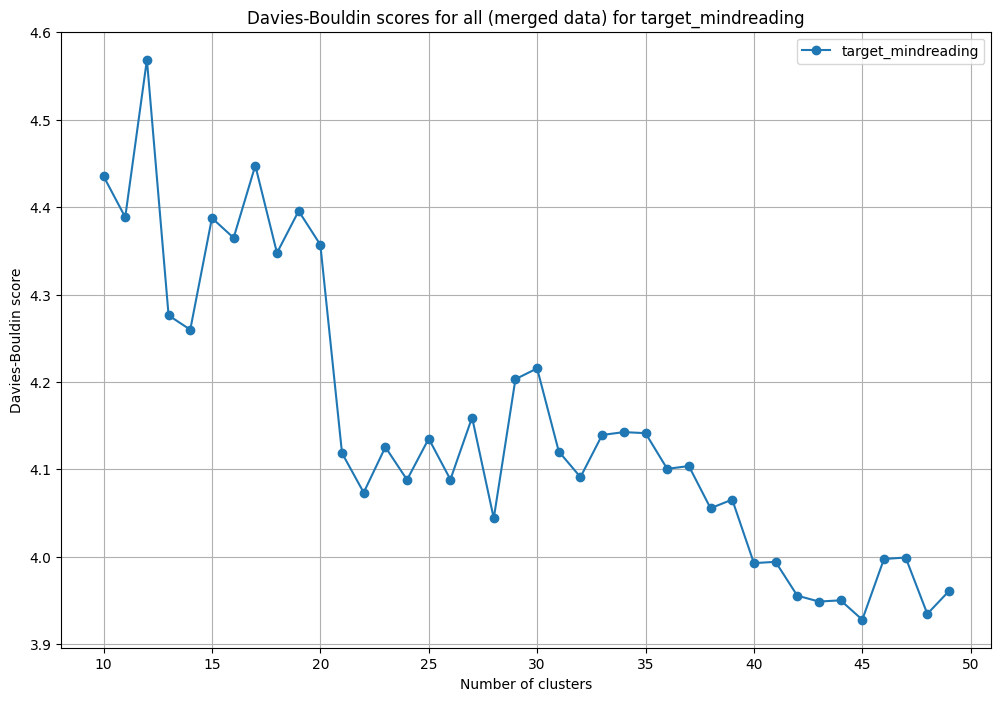

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores9, marker='o', label='target_mindreading')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_mindreading')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process10(sentences):
    target_ngrams = target_overgeneralizing

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_overgeneralizing is: {optimal_k}')
    return optimal_k, scores

optimal_k10, scores10 = process10(all_sentences_total)

The optimal number of clusters for target_overgeneralizing is: 44


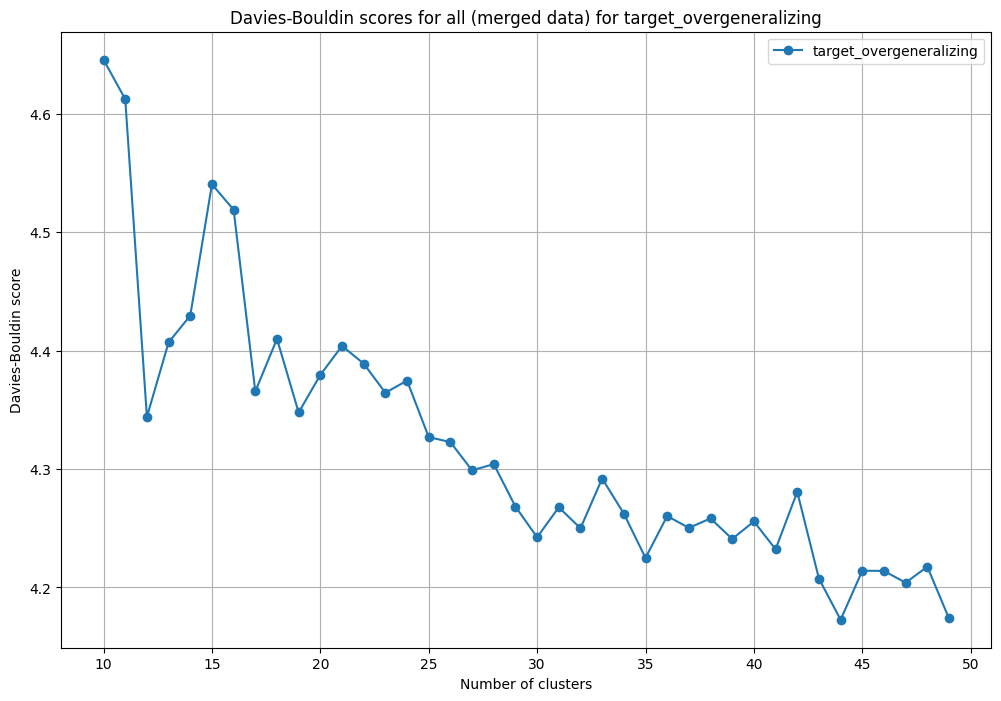

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores10, marker='o', label='target_overgeneralizing')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_overgeneralizing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process11(sentences):
    target_ngrams = target_personalizing

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_personalizing is: {optimal_k}')
    return optimal_k, scores

optimal_k11, scores11 = process11(all_sentences_total)

The optimal number of clusters for target_personalizing is: 29


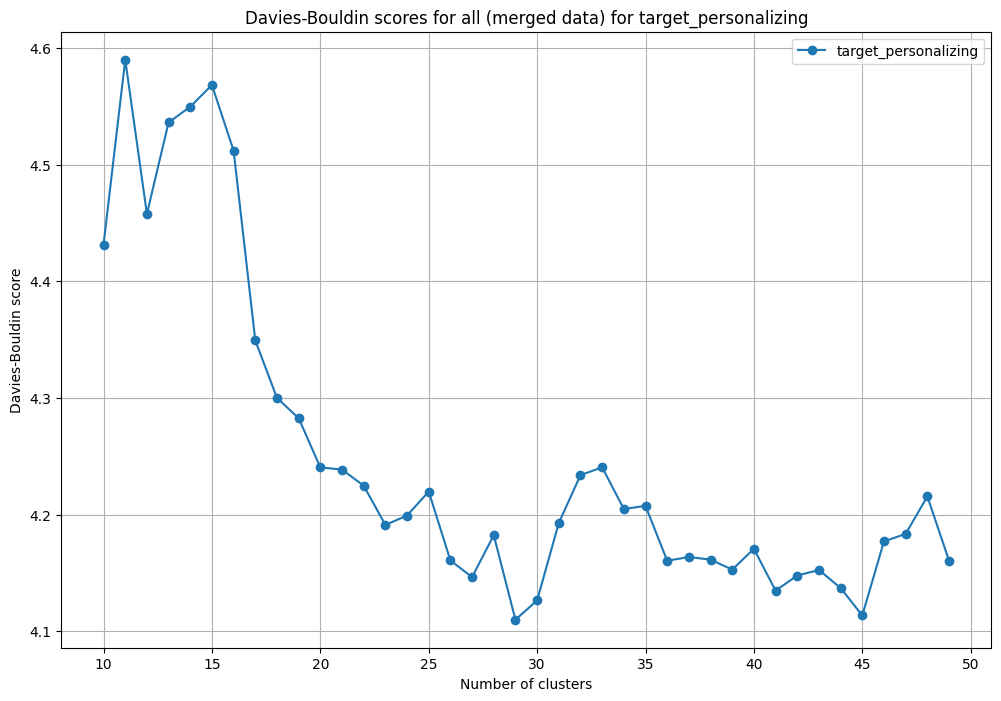

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores11, marker='o', label='target_personalizing')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_personalizing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def process12(sentences):
    target_ngrams = target_should_statements

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for target_should_statements is: {optimal_k}')
    return optimal_k, scores

optimal_k12, scores12 = process12(all_sentences_total)

The optimal number of clusters for target_should_statements is: 43


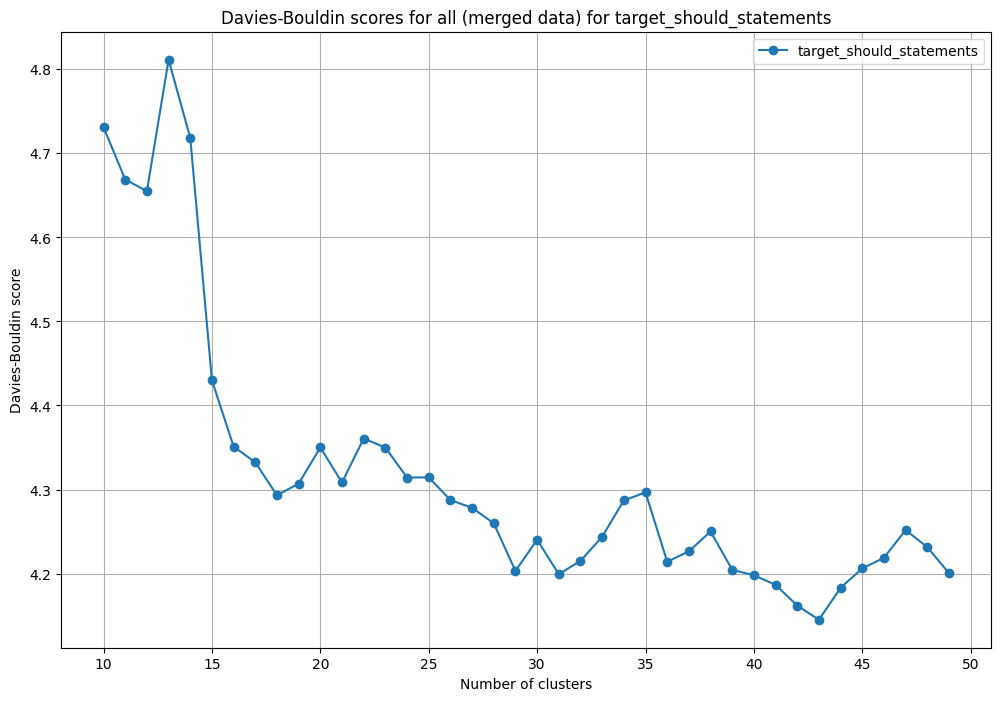

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores12, marker='o', label='target_should_statements')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for target_should_statements')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

score_list = [scores1, scores2, scores3, scores4, scores5, scores6,
              scores7, scores8, scores9, scores10, scores11, scores12]
labels = ['Catastrophizing', 'Dichotomous Reasoning', 'Disqualifying the positives', 'Emotional Reasoning',
          'Fortune telling', 'Labeling and mislabeling', 'Magnification and minimization', 'Mental Filtering',
          'Mindreading', 'Overgeneralizing', 'Personalizing', 'Should Statements']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(list(range(10, 50)), score_list[i], marker='o', label=labels[i])
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Davies-Bouldin score')
    ax.set_title(f'Davies-Bouldin scores for {labels[i]}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

score_list = [scores1, scores2, scores3, scores4, scores5, scores6,
              scores7, scores8, scores9, scores10, scores11, scores12]
labels = ['Catastrophizing', 'Dichotomous Reasoning', 'Disqualifying the positives', 'Emotional Reasoning',
          'Fortune telling', 'Labeling and mislabeling', 'Magnification and minimization', 'Mental Filtering',
          'Mindreading', 'Overgeneralizing', 'Personalizing', 'Should Statements']
optimal_k_values = [optimal_k1, optimal_k2, optimal_k3, optimal_k4,
                    optimal_k5, optimal_k6, optimal_k7, optimal_k8,
                    optimal_k9, optimal_k10, optimal_k11, optimal_k12]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(list(range(10, 50)), score_list[i], marker='o', label=labels[i])
    ax.plot(list(range(10, 50)), score_list[i], marker='o', label=f'{labels[i]} (optimal_k={optimal_k_values[i]})')

    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Davies-Bouldin score')
    ax.set_title(f'Davies-Bouldin scores for {labels[i]}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def filter_sentences(sentences, ngrams):
        filtered_sentences = []
        for sentence in sentences:
            for ngram in ngrams:
                if ngram in sentence:
                    filtered_sentences.append(sentence)
                    break
        return filtered_sentences
def evaluate(embeddings, k_range):
        scores = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
            labels = kmeans.labels_
            score = davies_bouldin_score(embeddings, labels)
            scores.append(score)
            # print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
        return scores

In [ ]:
def process(sentences):
    target_ngrams = targetwords.target_dichotomous_Reasoning

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings2 = model.encode(filtered_sentences2)

    k_range = range(10, 50)
    scores = evaluate(embeddings2, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for Dichotomous Reasoning is: {optimal_k}')
    return optimal_k, scores

optimal_k2, scores2 = process(all_sentences_total)

plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores1, marker='o', label='Dichotomous Reasoning')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for Dichotomous Reasoning')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
def process(sentences):
    target_ngrams = targetwords.target_dichotomous_Reasoning
    def filter_sentences(sentences, ngrams):
        filtered_sentences = []
        for sentence in sentences:
            for ngram in ngrams:
                if ngram in sentence:
                    filtered_sentences.append(sentence)
                    break
        return filtered_sentences
    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)
    def evaluate(embeddings, k_range):
        scores = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
            labels = kmeans.labels_
            score = davies_bouldin_score(embeddings, labels)
            scores.append(score)
            # print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
        return scores
    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for Dichotomous Reasoning is: {optimal_k}')
    return optimal_k, scores

optimal_k2, scores2 = process(all_sentences_total)

plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores2, marker='o', label='Dichotomous Reasoning')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for Dichotomous Reasoning')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
def process(sentences):
    target_ngrams = targetwords.target_disqualifying_the_positives
    def filter_sentences(sentences, ngrams):
        filtered_sentences = []
        for sentence in sentences:
            for ngram in ngrams:
                if ngram in sentence:
                    filtered_sentences.append(sentence)
                    break
        return filtered_sentences
    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)
    def evaluate(embeddings, k_range):
        scores = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
            labels = kmeans.labels_
            score = davies_bouldin_score(embeddings, labels)
            scores.append(score)
            # print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
        return scores
    k_range = range(10, 50)
    scores = evaluate(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters for Disqualifying the positives is: {optimal_k}')
    return optimal_k, scores

optimal_k2, scores2 = process(all_sentences_total)

plt.figure(figsize=(12, 8))
plt.plot(list(range(10, 50)), scores2, marker='o', label='Disqualifying_the_positives')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all (merged data) for Disqualifying_the_positives')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
def filter_sentences(sentences, ngrams):
  filtered_sentences = []
  for sentence in sentences:
      for ngram in ngrams:
          if ngram in sentence:
              filtered_sentences.append(sentence)
              break
  return filtered_sentences
def evaluate(embeddings, k_range):
  scores = []
  for k in k_range:
      kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
      labels = kmeans.labels_
      score = davies_bouldin_score(embeddings, labels)
      scores.append(score)
      # print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
  return scores
def process(sentences, target_ngrams):
  filtered_sentences = filter_sentences(sentences, target_ngrams)
  embeddings = model.encode(filtered_sentences)
  k_range = range(10, 50)
  scores = evaluate(embeddings, k_range)
  optimal_k = k_range[np.argmin(scores)]
  print(f'The optimal number of clusters for Disqualifying the positives is: {optimal_k}')
  return optimal_k, scores

In [ ]:
def plot_and_process(sentences, target_ngrams, ngram_name):
  optimal_k2, scores2 = process(all_sentences_total, target_ngrams)
  plt.figure(figsize=(12, 8))
  plt.plot(list(range(10, 50)), scores2, marker='o', label=f'{ngram_name}')
  plt.xlabel('Number of clusters')
  plt.ylabel('Davies-Bouldin score')
  plt.title(f'Davies-Bouldin scores for all (merged data) for {ngram_name}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
from targetwords import target_catastrophizing

The optimal number of clusters for Disqualifying the positives is: 47


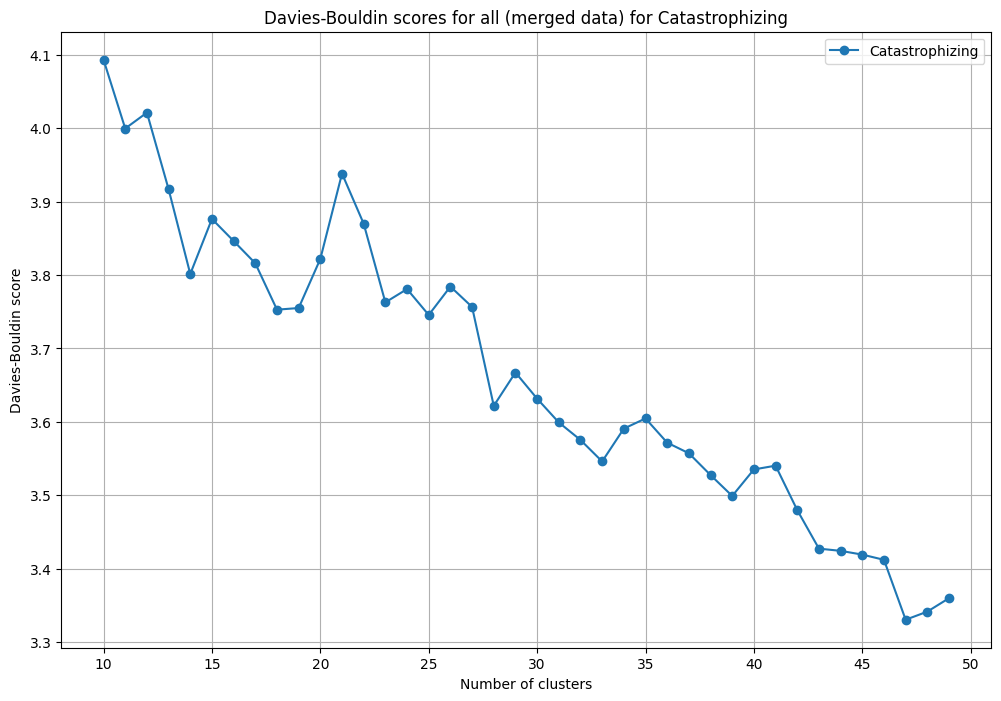

In [ ]:
plot_and_process(all_sentences_total, target_catastrophizing, 'Catastrophizing')

In [ ]:
plot_and_process(all_sentences_total, targetwords.target_dichotomous_Reasoning, 'Dichotomous Reasoning')

KeyboardInterrupt: 

In [ ]:
def process_distortion(sentences, target_ngrams):
    def filter_sentences(sentences, ngrams):
        filtered_sentences = []
        for sentence in sentences:
            for ngram in ngrams:
                if ngram in sentence:
                    filtered_sentences.append(sentence)
                    break
        return filtered_sentences

    filtered_sentences = filter_sentences(sentences, target_ngrams)
    embeddings = model.encode(filtered_sentences)

    def evaluate_clustering(embeddings, k_range):
        scores = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
            labels = kmeans.labels_
            score = davies_bouldin_score(embeddings, labels)
            scores.append(score)
            print(f'Number of clusters: {k}, Davies-Bouldin score: {score}')
        return scores

    k_range = range(10, 100)
    scores = evaluate_clustering(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    print(f'The optimal number of clusters is: {optimal_k}')
    return optimal_k, scores

In [ ]:
import os
os.makedirs('cluster_data', exist_ok=True)
os.makedirs('plots', exist_ok=True)
optimal_ks = {}
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [ ]:
targetwords.target_catastrophizing

['will fail',
 'gonna fail',
 'will go wrong',
 'will end',
 'will be impossible',
 'will b impossible',
 'will not happen',
 "won't happen",
 "ain't gonna happen",
 'not gonna happen',
 'will be terrible',
 'will b terrible',
 'gonna be terrible',
 'gonna b terrible',
 'will be horrible',
 'will b horrible',
 'gonna be horrible',
 'gonna b horrible',
 'will be a catastrophe',
 'will b a catastrophe',
 'gonna be a catastrophe',
 'gonna b a catastrophe',
 'will be catastrophe',
 'will b catastrophe',
 'gonna be catastrophe',
 'gonna b catastrophe',
 'will be a disaster',
 'will b a disaster',
 'gonna be a disaster',
 'gonna b a disaster',
 'will be disaster',
 'will b disaster',
 'gonna be disaster',
 'gonna b disaster',
 'will never end',
 'will nvr end',
 "won't end",
 'never gonna end',
 'never gonna nd',
 'will not end',
 "won't end"]

In [ ]:
distortion_categories = [
    ('Catastrophizing', targetwords.target_catastrophizing),
    ('Dichotomous Reasoning', targetwords.target_dichotomous_Reasoning),
    ('Disqualifying the Positives', targetwords.target_disqualifying_the_positives),
    ('Emotional Reasoning', targetwords.target_emotional_reasoning),
    ('Fortune Telling', targetwords.target_fortune_telling),
    ('Labeling and Mislabeling', targetwords.target_labeling_and_mislabeling),
    ('Magnification and Minimization', targetwords.target_magnification_and_minimization),
    ('Mental Filtering', targetwords.target_mental_filtering),
    ('Mind Reading', targetwords.target_mindreading),
    ('Overgeneralizing', targetwords.target_overgeneralizing),
    ('Personalizing', targetwords.target_personalizing),
    ('Should Statements', targetwords.target_should_statements)
]

In [ ]:
for i, (category, ngrams) in enumerate(distortion_categories, start=1):
    print(f'Processing {category}')

    optimal_k_all, scores_all = process_distortion(all_sentences_total, ngrams)
    optimal_ks[category] = optimal_k_all

    np.save(f'cluster_data/{category}_scores.npy', scores_all)

    plt.subplot(4, 3, i)  # Adjust the grid as needed (4x3 for 12 plots)
    plt.plot(list(range(10, 100)), scores_all, marker='o', label=f'{category}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin score')
    plt.title(f'{category}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.savefig('plots/combined_distortion_clustering_plots.png')
plt.show()


Processing Catastrophizing


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 10, Davies-Bouldin score: 3.988683035040225


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 11, Davies-Bouldin score: 4.043212719450448


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 12, Davies-Bouldin score: 4.142938317418612


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 13, Davies-Bouldin score: 3.9367934046576614


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 14, Davies-Bouldin score: 4.027236083669925


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 15, Davies-Bouldin score: 3.7766586438331218


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 16, Davies-Bouldin score: 3.781902083473935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 17, Davies-Bouldin score: 3.816119438932144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 18, Davies-Bouldin score: 3.752897607004095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 19, Davies-Bouldin score: 3.989440367820843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 20, Davies-Bouldin score: 3.7293292885424245


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 21, Davies-Bouldin score: 3.7368076441750833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 22, Davies-Bouldin score: 3.7335562006269445


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 23, Davies-Bouldin score: 3.7239320699441376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 24, Davies-Bouldin score: 3.665139859536923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 25, Davies-Bouldin score: 3.7842943410872203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 26, Davies-Bouldin score: 3.725704550056965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 27, Davies-Bouldin score: 3.5788156364971684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 28, Davies-Bouldin score: 3.5579411307030475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 29, Davies-Bouldin score: 3.5900128371020488


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 30, Davies-Bouldin score: 3.5904174075915645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 31, Davies-Bouldin score: 3.6137402454799377


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 32, Davies-Bouldin score: 3.5557214570840516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 33, Davies-Bouldin score: 3.5364907060794963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 34, Davies-Bouldin score: 3.558886734460341


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 35, Davies-Bouldin score: 3.6215491810435556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 36, Davies-Bouldin score: 3.608462901600328


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 37, Davies-Bouldin score: 3.595812243516611


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 38, Davies-Bouldin score: 3.5548893794875327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 39, Davies-Bouldin score: 3.4234850017760934


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 40, Davies-Bouldin score: 3.3764762301920825


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 41, Davies-Bouldin score: 3.440036259285835


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 42, Davies-Bouldin score: 3.432267868100628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 43, Davies-Bouldin score: 3.358524190097079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 44, Davies-Bouldin score: 3.456848298780423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 45, Davies-Bouldin score: 3.4189932392956655


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 46, Davies-Bouldin score: 3.3533075875093767


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 47, Davies-Bouldin score: 3.369215149119314


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 48, Davies-Bouldin score: 3.261546994049977


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 49, Davies-Bouldin score: 3.357525401916718


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 50, Davies-Bouldin score: 3.3836206272445617


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 51, Davies-Bouldin score: 3.3736255782426747


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 52, Davies-Bouldin score: 3.364053606297838


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 53, Davies-Bouldin score: 3.371965407355775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 54, Davies-Bouldin score: 3.3175322059185115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 55, Davies-Bouldin score: 3.300729811051683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 56, Davies-Bouldin score: 3.3434284191094292


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 57, Davies-Bouldin score: 3.24293607491941


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 58, Davies-Bouldin score: 3.2090707548781725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 59, Davies-Bouldin score: 3.183322836841642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 60, Davies-Bouldin score: 3.244910338951951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 61, Davies-Bouldin score: 3.21964478873028


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 62, Davies-Bouldin score: 3.2041356195194393


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 63, Davies-Bouldin score: 3.1613883608467916


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 64, Davies-Bouldin score: 3.196739374878068


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 65, Davies-Bouldin score: 3.183864039628862


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 66, Davies-Bouldin score: 3.171313731785967


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 67, Davies-Bouldin score: 3.1470018099931636


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 68, Davies-Bouldin score: 3.153833676795644


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 69, Davies-Bouldin score: 3.1371100856627834


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 70, Davies-Bouldin score: 3.1209449265826543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 71, Davies-Bouldin score: 2.970339711041477


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 72, Davies-Bouldin score: 3.1080288349234175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 73, Davies-Bouldin score: 3.098323466000082


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 74, Davies-Bouldin score: 3.0847767913080055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 75, Davies-Bouldin score: 3.0655203376469093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 76, Davies-Bouldin score: 3.061747467228451


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 77, Davies-Bouldin score: 3.0399000819891735


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 78, Davies-Bouldin score: 3.0091613148211565


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 79, Davies-Bouldin score: 3.0533617704888902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 80, Davies-Bouldin score: 2.980283316604191


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 81, Davies-Bouldin score: 2.9700563500568307


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 82, Davies-Bouldin score: 2.9646662259516905


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 83, Davies-Bouldin score: 2.951907760933495


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 84, Davies-Bouldin score: 2.9442402481817727


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 85, Davies-Bouldin score: 2.9224371666789355


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 86, Davies-Bouldin score: 2.9052111542781756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 87, Davies-Bouldin score: 2.891726649947703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 88, Davies-Bouldin score: 2.8782394664825195


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 89, Davies-Bouldin score: 2.8996227425895955


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 90, Davies-Bouldin score: 2.8983287651503726


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 91, Davies-Bouldin score: 2.87462726812003


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 92, Davies-Bouldin score: 2.8662606496111978


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 93, Davies-Bouldin score: 2.8923698246533163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 94, Davies-Bouldin score: 2.8492321655100024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 95, Davies-Bouldin score: 2.831000389732617


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 96, Davies-Bouldin score: 2.8383415436720285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 97, Davies-Bouldin score: 2.821932303517794


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 98, Davies-Bouldin score: 2.777835255662708


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 99, Davies-Bouldin score: 2.8869810611092603
The optimal number of clusters is: 98
Processing Dichotomous Reasoning


In [ ]:
print("Optimal number of clusters for each distortion category:", optimal_ks)

Processing Catastrophizing


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Davies-Bouldin score: 3.786726428468326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 11, Davies-Bouldin score: 4.0757670629123615


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 12, Davies-Bouldin score: 4.063246782708474


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 13, Davies-Bouldin score: 3.95428170585654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 14, Davies-Bouldin score: 3.936564475377992


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 15, Davies-Bouldin score: 3.9965548692126287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 16, Davies-Bouldin score: 3.90017323377774


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 17, Davies-Bouldin score: 3.848482593924377


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 18, Davies-Bouldin score: 3.8430759382807427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 19, Davies-Bouldin score: 3.8261624642201695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 20, Davies-Bouldin score: 3.7026471733578945


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 21, Davies-Bouldin score: 3.755888076071958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 22, Davies-Bouldin score: 3.802236983048368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 23, Davies-Bouldin score: 3.6694566634401182


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 24, Davies-Bouldin score: 3.62601985243372


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 25, Davies-Bouldin score: 3.6164671060064713


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 26, Davies-Bouldin score: 3.5786439605253126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 27, Davies-Bouldin score: 3.5764623891450964


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 28, Davies-Bouldin score: 3.6967028845539858


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 29, Davies-Bouldin score: 3.707453134864697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 30, Davies-Bouldin score: 3.585995394454392


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 31, Davies-Bouldin score: 3.565841323760494


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 32, Davies-Bouldin score: 3.6484074563889504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 33, Davies-Bouldin score: 3.552834238446951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 34, Davies-Bouldin score: 3.4377882741225267


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 35, Davies-Bouldin score: 3.6092981088363647


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 36, Davies-Bouldin score: 3.554494458460991


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 37, Davies-Bouldin score: 3.4818946366287564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 38, Davies-Bouldin score: 3.491508799985668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 39, Davies-Bouldin score: 3.4457703093782936


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 40, Davies-Bouldin score: 3.3715934948651123


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 41, Davies-Bouldin score: 3.4220204231064306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 42, Davies-Bouldin score: 3.376677556613444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 43, Davies-Bouldin score: 3.44115051139145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 44, Davies-Bouldin score: 3.3574166043311426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 45, Davies-Bouldin score: 3.4139521522152285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 46, Davies-Bouldin score: 3.4769465424359587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 47, Davies-Bouldin score: 3.402266234667429


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 48, Davies-Bouldin score: 3.4483247985024517


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 49, Davies-Bouldin score: 3.367918819905556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 50, Davies-Bouldin score: 3.336382963678913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 51, Davies-Bouldin score: 3.3876106184751205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 52, Davies-Bouldin score: 3.305119754983238


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 53, Davies-Bouldin score: 3.2519067305665685


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 54, Davies-Bouldin score: 3.311342536601314


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 55, Davies-Bouldin score: 3.265679062909991


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 56, Davies-Bouldin score: 3.26914230727808


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 57, Davies-Bouldin score: 3.2195395546652485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 58, Davies-Bouldin score: 3.25194132846293


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 59, Davies-Bouldin score: 3.1660715984857966


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 60, Davies-Bouldin score: 3.1449457578914317


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 61, Davies-Bouldin score: 3.19897657107687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 62, Davies-Bouldin score: 3.223765375645076


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 63, Davies-Bouldin score: 3.1171721860424397


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 64, Davies-Bouldin score: 3.1815373179523845


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 65, Davies-Bouldin score: 3.180837180479843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 66, Davies-Bouldin score: 3.1340527881878004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 67, Davies-Bouldin score: 3.0615532636909464


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 68, Davies-Bouldin score: 3.118366576114519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 69, Davies-Bouldin score: 3.1295554606371714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 70, Davies-Bouldin score: 3.1468423870785323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 71, Davies-Bouldin score: 3.0835843621724477


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 72, Davies-Bouldin score: 3.098349354787786


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 73, Davies-Bouldin score: 3.0693844127534833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 74, Davies-Bouldin score: 3.0616514761066633


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 75, Davies-Bouldin score: 3.109355820776757


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 76, Davies-Bouldin score: 3.086523776936709


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 77, Davies-Bouldin score: 2.9191731504819813


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 78, Davies-Bouldin score: 3.05790571931306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 79, Davies-Bouldin score: 2.994820448706242


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 80, Davies-Bouldin score: 2.872129206252667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 81, Davies-Bouldin score: 2.999321140601128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 82, Davies-Bouldin score: 3.0300856644544782


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 83, Davies-Bouldin score: 2.965552965301545


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 84, Davies-Bouldin score: 2.999769468909177


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 85, Davies-Bouldin score: 2.9319636107858393


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 86, Davies-Bouldin score: 2.952787507195117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 87, Davies-Bouldin score: 2.9074171616948026


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 88, Davies-Bouldin score: 2.929507920379281


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 89, Davies-Bouldin score: 2.8372714396404817


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 90, Davies-Bouldin score: 2.8775616737993004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 91, Davies-Bouldin score: 2.7955386427604725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 92, Davies-Bouldin score: 2.8740279134937423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 93, Davies-Bouldin score: 2.7790220522510216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 94, Davies-Bouldin score: 2.807248656992656


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 95, Davies-Bouldin score: 2.8065400340060407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 96, Davies-Bouldin score: 2.771422013640209


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 97, Davies-Bouldin score: 2.856579164420481


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 98, Davies-Bouldin score: 2.7351259459809225


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 99, Davies-Bouldin score: 2.830045971190146
The optimal number of clusters is: 98


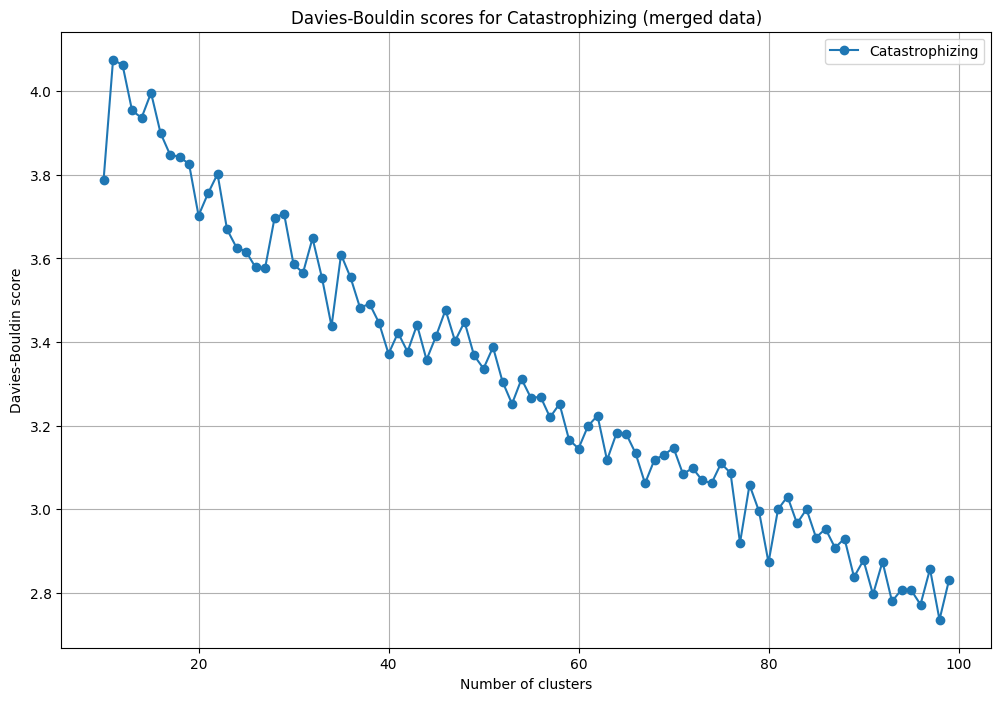

Processing Dichotomous Reasoning


KeyboardInterrupt: 

In [ ]:
optimal_ks = {}
for category, ngrams in distortion_categories:
    print(f'Processing {category}')
    optimal_k_all, scores_all = process_distortion(all_sentences_total, ngrams)
    optimal_ks[category] = optimal_k_all

    plt.figure(figsize=(12, 8))
    plt.plot(list(range(10, 100)), scores_all, marker='o', label=f'{category}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin score')
    plt.title(f'Davies-Bouldin scores for {category} (merged data)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
plt.figure(figsize=(18, 12))
for category, ngrams in distortion_categories.items():
    _, scores_all = process_distortion(all_sentences_total, ngrams)
    plt.plot(list(range(10, 100)), scores_all, marker='o', label=f'{category}')

plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores for all categories (merged data)')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal number of clusters for each distortion category:", optimal_ks)